In [2]:
from sklearn.neural_network import MLPClassifier as nnet
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.model_selection import StratifiedKFold as strat
import numpy as np

# converts the data in the file to two arrays, one with the features and one with the class labels
def convert_data_to_array(filename):
    data = np.genfromtxt(filename, delimiter=',', dtype=np.float64)
    features, classes = np.split(data, [48], 1)
    return (features, classes)

feat, clss = convert_data_to_array("classification_train.data")
clss = np.reshape(clss, -1) # makes the data into a column vector

In [3]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def plot_LDA(test_data, test_labels, plot=True):
        lda = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', n_components=2)
        lda.fit(test_data, test_labels)
        feat_lda = lda.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        colors = ['orange','blue']
        if plot:
            plt.scatter(feat_lda[:,0], np.zeros(feat_lda[:,0].shape), s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='-1')
            blue_patch = mpatches.Patch(color='blue', label='1')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 20})
        return feat_lda
def plot_QDA(test_data, test_labels, plot=True):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(test_data, test_labels)
    feat_qda = qda.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    colors = ['orange','blue']
    if plot:
        plt.scatter(feat_qda[:,0], np.zeros(feat_qda[:,0].shape), s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='-1')
        blue_patch = mpatches.Patch(color='blue', label='1')
        plt.legend(handles=[orange_patch, blue_patch], prop={'size': 20})
    return feat_qda
def plot_LSA(test_data, test_labels, plot=True):
        svd = TruncatedSVD(n_components=2)
        svd.fit(test_data)
        feat_svd = svd.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        colors = ['orange','blue']
        if plot:
            plt.scatter(feat_svd[:,0], feat_svd[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='-1')
            blue_patch = mpatches.Patch(color='blue', label='1')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 20})
        return feat_svd
# Obtained PCA code from https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
def plot_PCA(test_data, test_labels, plot=True):
        pca = PCA(n_components=2)
        pca.fit(test_data)
        feat_pca = pca.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        colors = ['orange','blue']
        if plot:
            plt.scatter(feat_pca[:,0], feat_pca[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='-1')
            blue_patch = mpatches.Patch(color='blue', label='1')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 20})
        return feat_pca

In [4]:
def get_validation_accuracy(classifier, data):
    # create the 10 folds in the dataset
    skf = strat(n_splits=10, shuffle=True)
    skf.get_n_splits(feat, clss)


    fold = 0
    accuracy_sum = 0
    y_test_total = np.empty(shape=0)
    res_total = np.empty(shape=0)
    for train_index, test_index in skf.split(data, clss):
        fold += 1
        # get test and training data for classes and feature arrays
        x_train, x_test = data[train_index], data[test_index]
        y_train, y_test = clss[train_index], clss[test_index]

        # train classifier
        classifier.fit(x_train, y_train)
        res = classifier.predict(x_test)

        # check accuracy of results
        classifier_correct = 0
        for i in range(len(res)):
            if res[i] == y_test[i]:
                classifier_correct += 1
        classifier_acc = float(classifier_correct)/float(len(res))
        accuracy_sum += classifier_acc
        y_test_total = np.concatenate((y_test_total, y_test))
        res_total = np.concatenate((res_total, res))
    return ((accuracy_sum / float(10)), y_test_total, res_total)

In [5]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

# Obtained Confusion Matrix code from https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

# First Iteration - Logistic Regression

array([[-128.85257719, -179.17306448],
       [ 291.45250218, -185.39353854],
       [-168.50957089,  -34.74130467],
       ...,
       [ 132.35574731, -160.09552199],
       [  94.39729609, -197.5299965 ],
       [ -42.85130949,  182.76392135]])

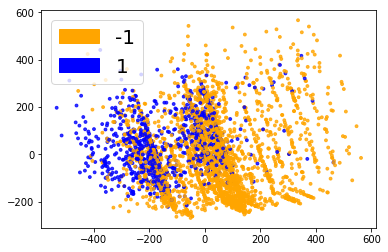

In [6]:
plot_PCA(feat, clss)

In [7]:
from sklearn.linear_model import LogisticRegression
accuracy, _, _ = get_validation_accuracy(LogisticRegression(), feat)
print(accuracy)

0.8504933824500374


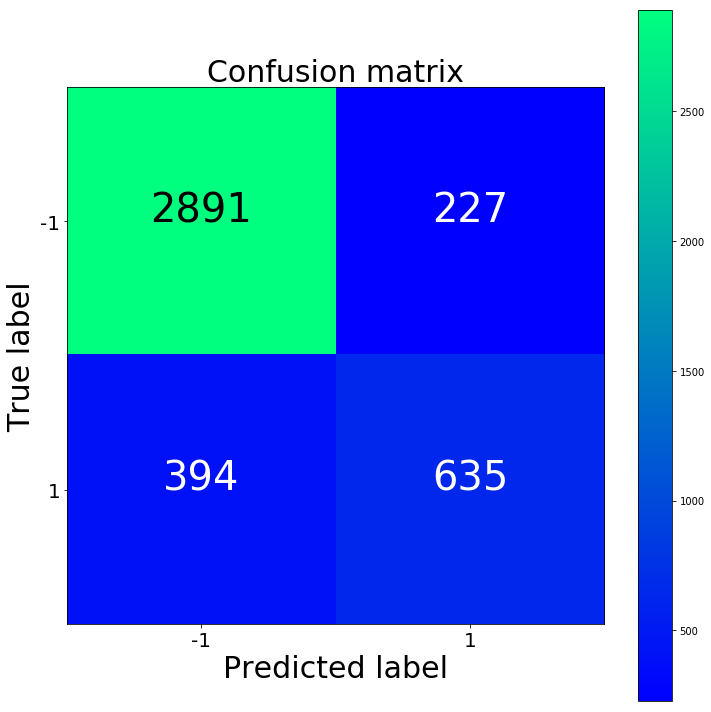

In [8]:
_, y_test, y_predicted_counts = get_validation_accuracy(LogisticRegression(), feat)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

# Changing the classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
accuracy, _, _ = get_validation_accuracy(KNeighborsClassifier(n_neighbors=15, weights='distance'), feat)
print(accuracy)

0.7998513462912252


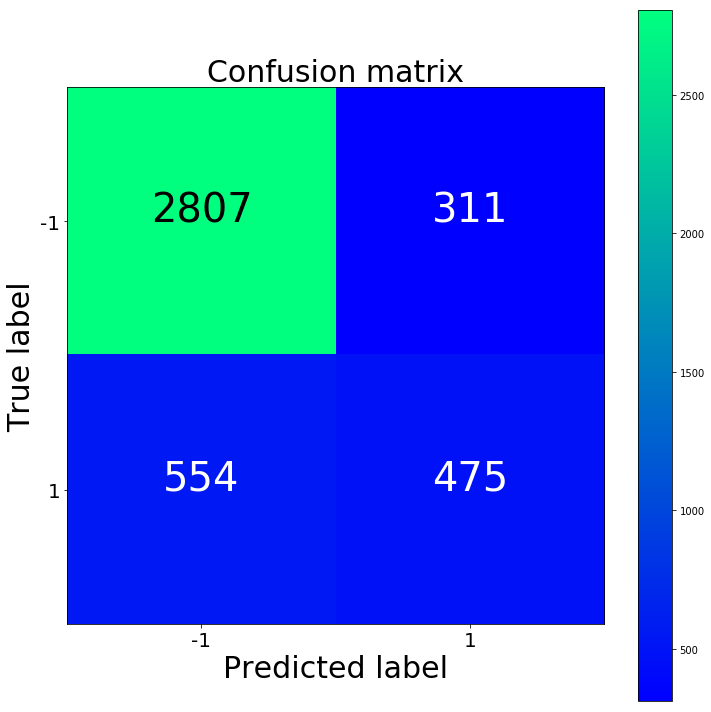

In [10]:
_, y_test, y_predicted_counts = get_validation_accuracy(KNeighborsClassifier(), feat)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

In [11]:
from sklearn.ensemble import AdaBoostClassifier
accuracy, _, _ = get_validation_accuracy(AdaBoostClassifier(), feat)
print(accuracy)

0.8574772571705921


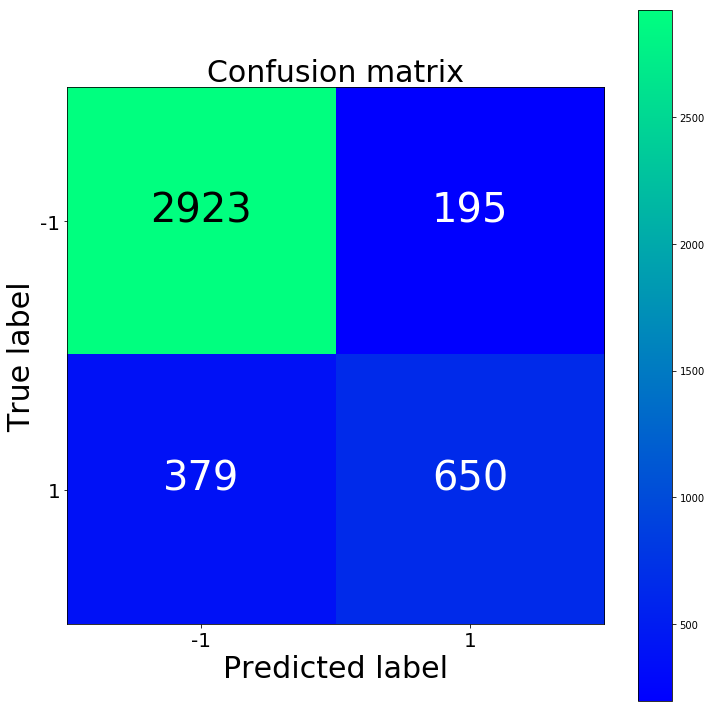

In [12]:
_, y_test, y_predicted_counts = get_validation_accuracy(AdaBoostClassifier(), feat)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

In [13]:
from sklearn.ensemble import BaggingClassifier
accuracy, _, _ = get_validation_accuracy(BaggingClassifier(base_estimator=LogisticRegression()), feat)
print(accuracy)

0.849760014194406


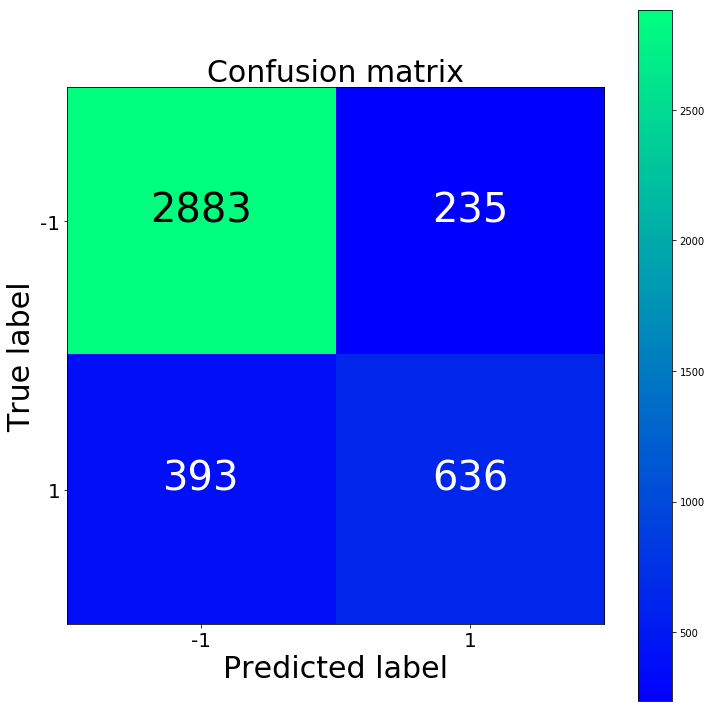

In [14]:
_, y_test, y_predicted_counts = get_validation_accuracy(BaggingClassifier(base_estimator=LogisticRegression()), feat)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
accuracy, _, _ = get_validation_accuracy(RandomForestClassifier(), feat)
print(accuracy)

0.8415672487472434


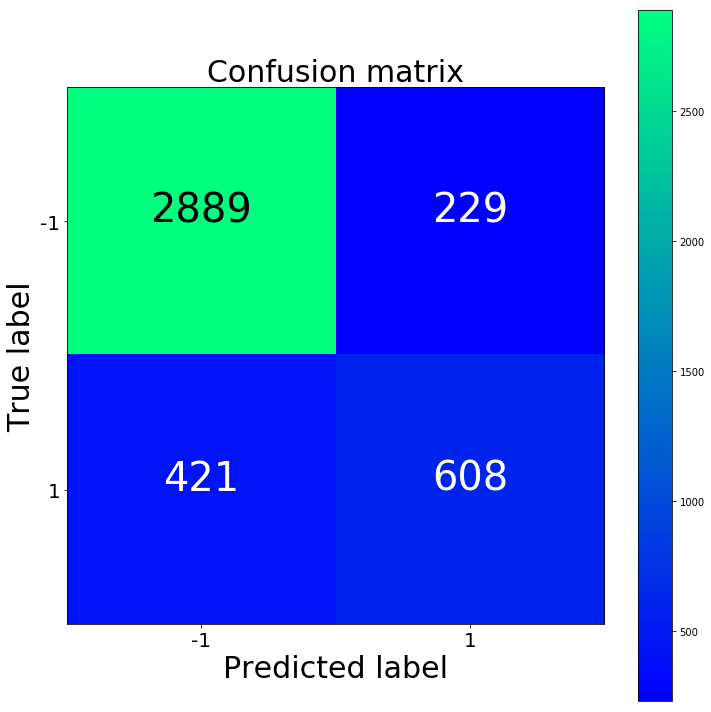

In [16]:
_, y_test, y_predicted_counts = get_validation_accuracy(RandomForestClassifier(), feat)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

Decent number of false positives in the models so far. Let's see if we can get that down

# Feature Selection

(4147, 24)
0.8615806412652752


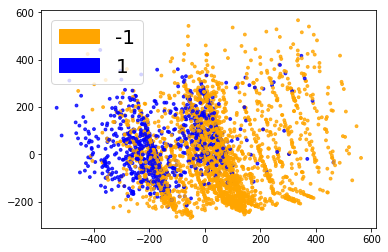

In [17]:
from sklearn.feature_selection import RFE
estimator = AdaBoostClassifier()
selector = RFE(estimator)
selector = selector.fit(feat, clss)
feat_reduced = feat[::, selector.support_]
print(feat_reduced.shape)
plot_PCA(feat_reduced, clss)
accuracy, _, _ = get_validation_accuracy(AdaBoostClassifier(), feat_reduced)
print(accuracy)

In [18]:
from sklearn.linear_model import LogisticRegression
accuracy, _, _ = get_validation_accuracy(LogisticRegression(), feat_reduced)
print(accuracy)

0.8514677371097894


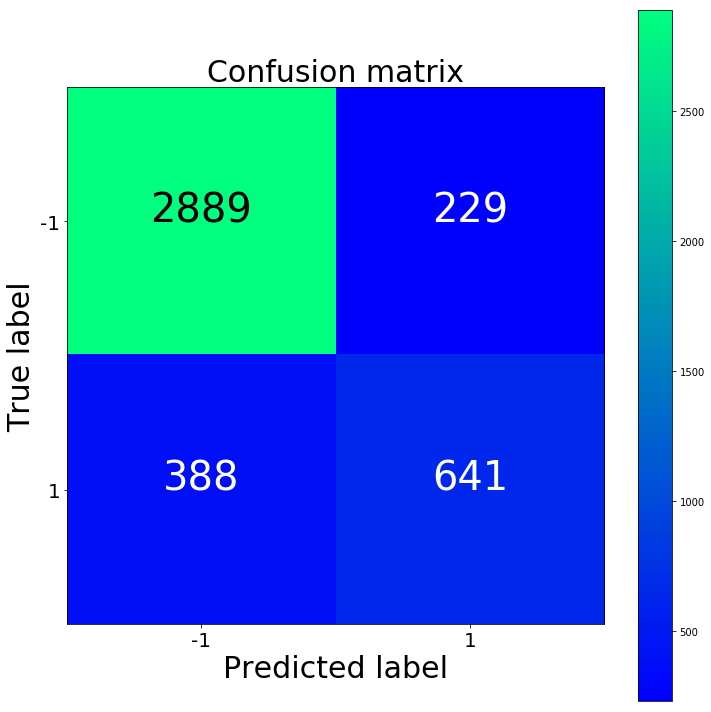

In [19]:
_, y_test, y_predicted_counts = get_validation_accuracy(LogisticRegression(), feat_reduced)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

This model seemed to introduce more false negatives without recuding the false positive rate. This is a step backwards.

0.7943085955782283


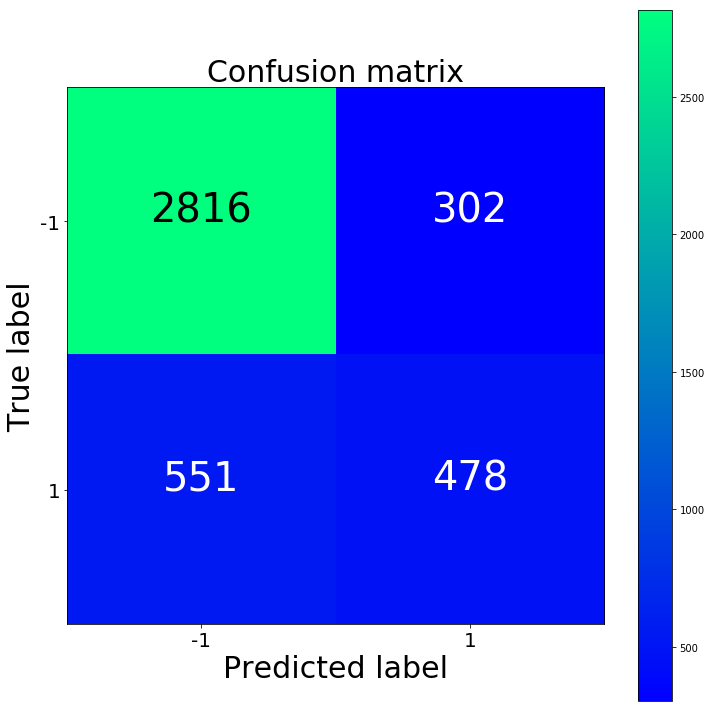

In [20]:
from sklearn.neighbors import KNeighborsClassifier
accuracy, y_test, y_predicted_counts = get_validation_accuracy(KNeighborsClassifier(n_neighbors=10, weights='distance'), feat_reduced)
print(accuracy)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

# My Best Classifier

0.8579679408231937


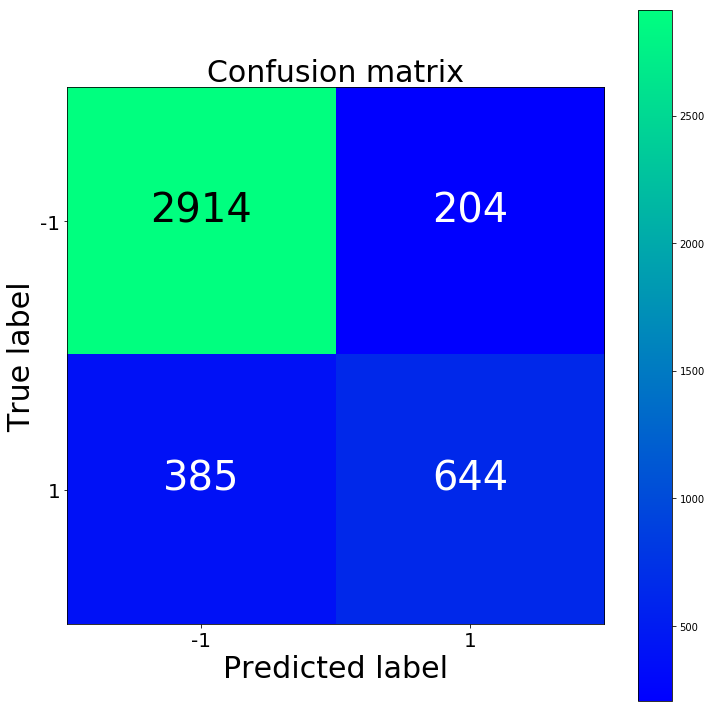

In [21]:
classifier = AdaBoostClassifier()
accuracy, y_test, y_predicted_counts = get_validation_accuracy(classifier, feat_reduced)
print(accuracy)
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['-1','1'], normalize=False, title='Confusion matrix')
plt.show()

In [22]:
data = np.genfromtxt('classification_test.data', delimiter=',', dtype=np.float64)
data, _ = np.split(data, [48], 1)
classifier = AdaBoostClassifier()
classifier.fit(feat_reduced, clss)
print(data.shape)

# Reduce the data
data_reduced = data[::, selector.support_]
results = list(classifier.predict(data_reduced))
with open('classification_results.txt', 'w+') as f:
    for result in results:
        f.write(str(result) + '\n')

(415, 48)
